In [1]:
import os
import utils
import model_scoring
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"  # or choose another backend if you wish
import pandas as pd
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, DatetimeTickFormatter
from bokeh.models.tools import HoverTool
from bokeh.io.export import get_screenshot_as_png
from bokeh.io import output_notebook
import sklearn
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import datetime
import keras
from keras.models import Sequential, Model
from keras.layers import Embedding, Flatten, Dense, Dropout, Input

Using plaidml.keras.backend backend.


In [2]:
output_notebook()

Loading BokehJS ...

In [3]:
train, test = utils.load_data(hourly=True)

Now, we will normalize the data.

In [4]:
mean = train.mean(axis=0)
std = train.std(axis=0)

utils.preprocess(train, mean, std)
utils.preprocess(test, mean, std)

In [5]:
labels = train['target'].tolist()
train.drop(columns=['target'], inplace=True)
train.head()

,temp,dwpt,heat_idx,rh,pressure,vis,wc,wdir,wspd,prcp,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2014-09-25 06:00:00,63.0,57.0,63.0,81.0,30.36,10.0,63.0,50.0,20.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2005-09-23 02:00:00,74.0,63.0,74.0,68.0,29.93,10.0,74.0,240.0,13.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2006-07-31 02:00:00,79.0,66.0,81.0,64.0,29.83,10.0,79.0,60.0,5.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2008-07-12 01:00:00,76.0,57.0,76.0,52.0,30.08,10.0,76.0,190.0,8.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2011-03-05 09:00:00,45.0,40.0,45.0,82.0,30.40,10.0,39.0,180.0,12.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [11]:
main_input = Input(shape=(train.shape[1],), name='main_input')

x = Dense(128, activation='relu')(main_input)
# x = Dropout(.25)(x)

output = Dense(1, name='output')(x)

model = Model(inputs=[main_input], outputs=output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 456)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               58496     
_________________________________________________________________
output (Dense)               (None, 1)                 129       
Total params: 58,625
Trainable params: 58,625
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
history = model.fit([train], labels,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                   )

Train on 94836 samples, validate on 23709 samples
Epoch 1/100
94836/94836 [==============================] - 16s 172us/step - loss: 0.0739 - mean_absolute_error: 0.2037 - val_loss: 0.1019 - val_mean_absolute_error: 0.2432
Epoch 2/100
94836/94836 [==============================] - 14s 146us/step - loss: 0.0686 - mean_absolute_error: 0.1958 - val_loss: 0.0750 - val_mean_absolute_error: 0.2004
Epoch 3/100
94836/94836 [==============================] - 11s 120us/step - loss: 0.0654 - mean_absolute_error: 0.1905 - val_loss: 0.1499 - val_mean_absolute_error: 0.2946
Epoch 4/100
94836/94836 [==============================] - 14s 152us/step - loss: 0.0628 - mean_absolute_error: 0.1863 - val_loss: 0.0486 - val_mean_absolute_error: 0.1611
Epoch 5/100
94836/94836 [==============================] - 13s 138us/step - loss: 0.0608 - mean_absolute_error: 0.1831 - val_loss: 0.0969 - val_mean_absolute_error: 0.2365
Epoch 6/100
94836/94836 [==============================] - 13s 141us/step - loss: 0.0591 -

94836/94836 [==============================] - 13s 135us/step - loss: 0.0433 - mean_absolute_error: 0.1521 - val_loss: 0.0391 - val_mean_absolute_error: 0.1418
Epoch 49/100
94836/94836 [==============================] - 11s 118us/step - loss: 0.0431 - mean_absolute_error: 0.1515 - val_loss: 0.0393 - val_mean_absolute_error: 0.1423
Epoch 50/100
94836/94836 [==============================] - 12s 126us/step - loss: 0.0430 - mean_absolute_error: 0.1517 - val_loss: 0.0463 - val_mean_absolute_error: 0.1586
Epoch 51/100
94836/94836 [==============================] - 12s 125us/step - loss: 0.0428 - mean_absolute_error: 0.1513 - val_loss: 0.0433 - val_mean_absolute_error: 0.1538
Epoch 52/100
94836/94836 [==============================] - 11s 114us/step - loss: 0.0428 - mean_absolute_error: 0.1510 - val_loss: 0.0437 - val_mean_absolute_error: 0.1564
Epoch 53/100
94836/94836 [==============================] - 11s 111us/step - loss: 0.0425 - mean_absolute_error: 0.1507 - val_loss: 0.0411 - val_mea

/home/osboxes/Documents/repos/nexml-nyiso/venv/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109053). Check your callbacks.
  % delta_t_median)


94836/94836 [==============================] - 17s 181us/step - loss: 0.0396 - mean_absolute_error: 0.1453 - val_loss: 0.0546 - val_mean_absolute_error: 0.1817
Epoch 90/100
94836/94836 [==============================] - 10s 107us/step - loss: 0.0395 - mean_absolute_error: 0.1452 - val_loss: 0.0382 - val_mean_absolute_error: 0.1428
Epoch 91/100
94836/94836 [==============================] - 12s 130us/step - loss: 0.0393 - mean_absolute_error: 0.1450 - val_loss: 0.1002 - val_mean_absolute_error: 0.2485
Epoch 92/100
94836/94836 [==============================] - 12s 129us/step - loss: 0.0393 - mean_absolute_error: 0.1449 - val_loss: 0.0550 - val_mean_absolute_error: 0.1711
Epoch 93/100
94836/94836 [==============================] - 14s 148us/step - loss: 0.0393 - mean_absolute_error: 0.1448 - val_loss: 0.0386 - val_mean_absolute_error: 0.1442
Epoch 94/100
94836/94836 [==============================] - 14s 153us/step - loss: 0.0392 - mean_absolute_error: 0.1448 - val_loss: 0.0550 - val_mea

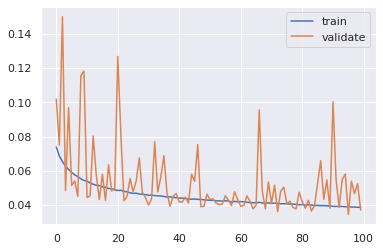

In [14]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validate')
plt.legend()
plt.show()

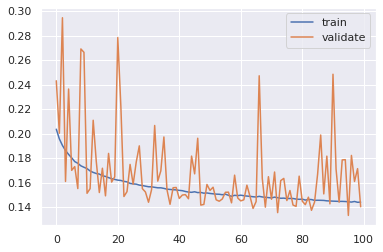

In [15]:
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='validate')
plt.legend()
plt.show()

In [16]:
# get the ISO hourly forecasts and clean them up
isolf = utils.isolf_hourly()

# get predictions made on day X for day X (which means the forecast for day X posted on day X)
isolf = isolf.loc[isolf['date_pred_for'].dt.date == isolf['date_pred_made'].dt.date]
isolf = isolf.set_index('date_pred_for')

In [20]:
predictions = model.predict(test.copy().drop(columns=['target']))

results = test.join(isolf, how='inner')
results['prediction'] = predictions
results['target'] *= std.target
results['target'] += mean.target
results['prediction'] *= std.target
results['prediction'] += mean.target

results['date'] = results.index
results = results.astype({'prediction': 'float'})

model_scoring.eval(results)

Total prediction error: 18359382.0
Total ISOLF prediction error: 1928610.0
Percentage of time the model outperformed the NYISO model: 6.45 (850/13171)


(                        target   temp  dwpt  heat_idx    rh  pressure   vis  \
 2006-08-03 12:00:00  10987.870   95.0  70.0     101.0  44.0     29.75  10.0   
 2010-07-07 15:00:00  10970.575  100.0  64.0     103.0  31.0     29.96  10.0   
 2010-07-07 11:00:00  10798.750   95.0  61.0      95.0  32.0     29.98  10.0   
 2010-06-28 16:00:00  10852.136   82.0  70.0      86.0  67.0     29.57  10.0   
 2006-08-02 19:00:00  10696.608   97.0  71.0     105.0  43.0     29.75   6.0   
 ...                        ...    ...   ...       ...   ...       ...   ...   
 2009-04-20 02:00:00   4142.033   46.0  37.0      46.0  71.0     30.13  10.0   
 2013-03-30 01:00:00   4491.367   45.0  28.0      45.0  53.0     30.11  10.0   
 2016-10-24 01:00:00   4219.867   58.0  43.0      58.0  58.0     29.81  10.0   
 2019-03-30 12:00:00   5122.392   60.0  43.0      60.0  53.0     30.02  10.0   
 2010-11-15 03:00:00   4123.850   51.0  47.0      51.0  86.0     30.01  10.0   
 
                         wc   wdir  ws

In [21]:
# just look at a small portion of the eval this time

results = results.head(90)  

results, pred_plot = model_scoring.eval(results)

/home/osboxes/Documents/repos/nexml-nyiso/nexml_nyiso/notebooks/model_scoring.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_index(inplace=True)


Total prediction error: 484933.0
Total ISOLF prediction error: 27894.0
Percentage of time the model outperformed the NYISO model: 0.0 (0/90)


/home/osboxes/Documents/repos/nexml-nyiso/nexml_nyiso/notebooks/model_scoring.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prediction_error'] = df['prediction'] - df['target']
/home/osboxes/Documents/repos/nexml-nyiso/nexml_nyiso/notebooks/model_scoring.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nyiso_prediction_error'] = df['nyiso_prediction'] - df['target']
/home/osboxes/Documents/repos/nexml-nyiso/nexml_nyiso/notebooks/model_scoring.py:39: SettingWithCopyWarning: 
A value is try

In [22]:
get_screenshot_as_png(pred_plot, driver=None)

RuntimeError: Neither firefox and geckodriver nor a variant of chromium browser and chromedriver are available on system PATH. You can install the former with 'conda install -c conda-forge firefox geckodriver'.

In [ ]:
results